In [1]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting

In [2]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('/kaggle/input/hacb-data/data'):
    if not j.startswith('.'): # If running this code locally, this is to 
                              # ensure you aren't reading in hidden folders
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'03_Chronic': 0, '04_Healthy_phase': 1, '02_Blast': 2, '01_accelerated': 3}

In [3]:
x_data = []
y_data = []
datacount = 0 # We'll use this to tally how many images are in our dataset

for j in os.listdir('/kaggle/input/hacb-data/data' + '/'):
    if not j.startswith('.'): # Again avoid hidden folders
        count = 0 # To tally images of a given gesture
        for k in os.listdir('/kaggle/input/hacb-data/data' + '/' + j + '/'):
            img = Image.open('/kaggle/input/hacb-data/data' + '/' + j + '/' + k).convert('L')
            img = img.resize((120, 120))
            arr = np.array(img)
            x_data.append(arr) 
            count = count + 1
        y_values = np.full((count, 1), lookup[j]) 
        y_data.append(y_values)
        datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape to be the correct size

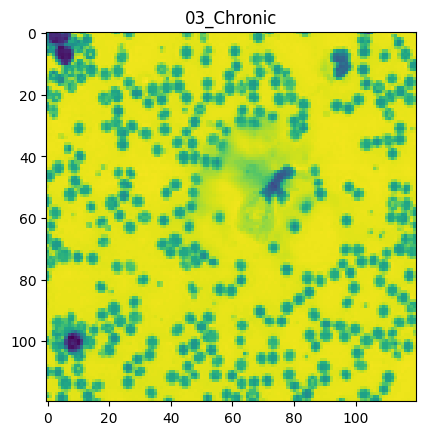

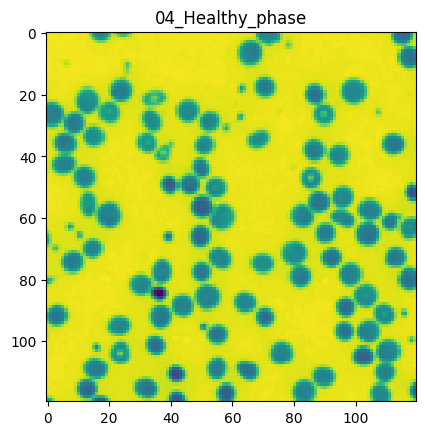

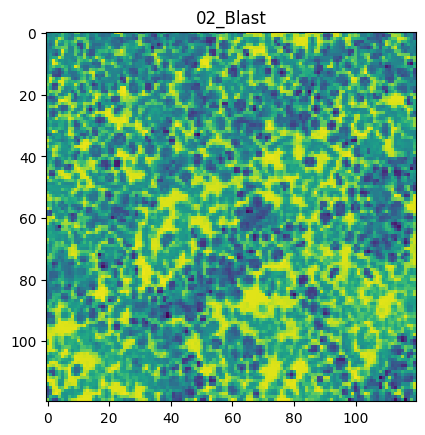

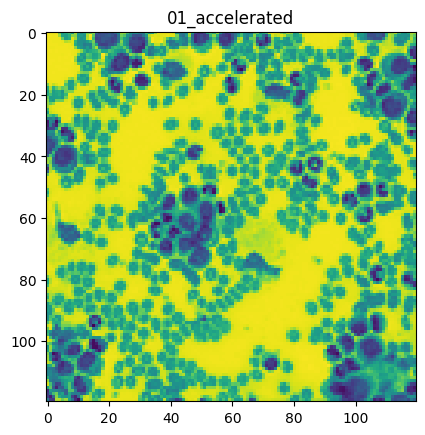

In [4]:
from random import randint
for i in range(0, 4):
    plt.imshow(x_data[i*80 , :, :])
    plt.title(reverselookup[y_data[i*80 ,0]])
    plt.show()

In [5]:
import keras
from keras.utils import to_categorical
y_data = to_categorical(y_data)

In [6]:
x_data = x_data.reshape((datacount, 120, 120, 1))
x_data /= 255

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.25,random_state=42)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5, random_state=42)

In [8]:
from keras import layers
from keras import models
from keras import metrics

In [9]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 120,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [10]:
len(x_train)

240

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=8, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/100
30/30 [==============================] - 3s 41ms/step - loss: 1.3913 - accuracy: 0.2542 - val_loss: 1.3356 - val_accuracy: 0.4500
Epoch 2/100
30/30 [==============================] - 1s 33ms/step - loss: 1.0223 - accuracy: 0.5875 - val_loss: 0.6052 - val_accuracy: 0.7250
Epoch 3/100
30/30 [==============================] - 1s 32ms/step - loss: 0.5195 - accuracy: 0.8042 - val_loss: 0.3388 - val_accuracy: 0.9000
Epoch 4/100
30/30 [==============================] - 1s 33ms/step - loss: 0.3834 - accuracy: 0.8417 - val_loss: 0.4365 - val_accuracy: 0.8500
Epoch 5/100
30/30 [==============================] - 1s 32ms/step - loss: 0.9816 - accuracy: 0.6333 - val_loss: 0.7270 - val_accuracy: 0.5500
Epoch 6/100
30/30 [==============================] - 1s 31ms/step - loss: 0.5752 - accuracy: 0.7458 - val_loss: 0.3857 - val_accuracy: 0.8500
Epoch 7/100
30/30 [==============================] - 1s 31ms/step - loss: 0.5508 - accuracy: 0.7458 - val_loss: 0.4797 - val_accuracy: 0.8250
Epoch 

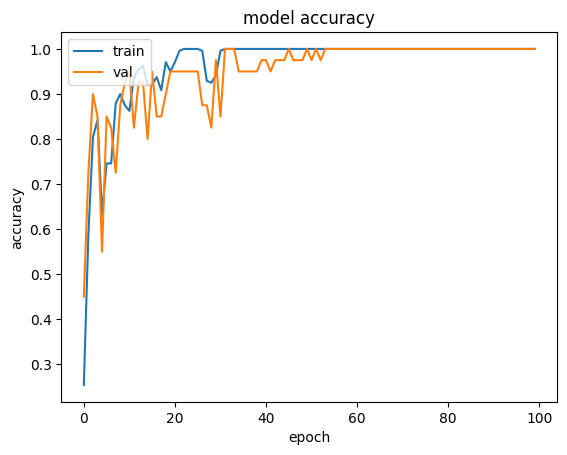

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

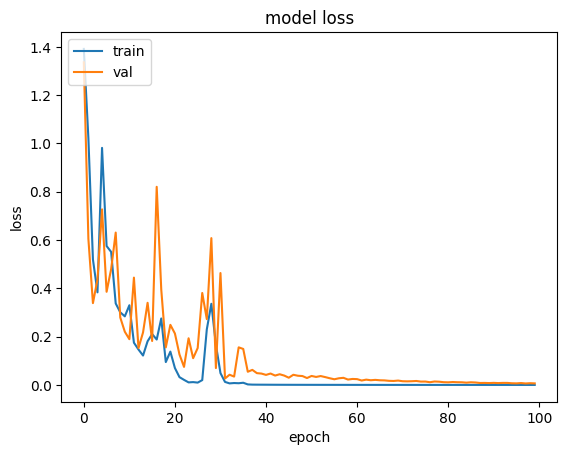

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

2/2 [==============================] - 0s 12ms/step - loss: 0.3465 - accuracy: 0.9500
Accuracy:0.949999988079071


In [15]:
len(x_test)

40

In [16]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

2/2 [==============================] - 0s 11ms/step


In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  0,  0],
       [ 0, 11,  0,  0],
       [ 0,  0, 11,  0],
       [ 1,  0,  1,  4]])

In [19]:
import numpy as np

In [20]:
Recall = (cm[0][0]/np.sum(np.array([cm[0]])) + cm[1][1]/np.sum(np.array([cm[1]])) + cm[2][2]/np.sum(np.array([cm[2]])) + cm[3][3]/np.sum(np.array([cm[3]])))/4

In [21]:
print("Recall is", Recall)

Recall is 0.9166666666666666
